<a href="https://colab.research.google.com/github/bemadi/Project-2/blob/main/Project_2_Wine_Quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predicting the Quality of Red and White Wines**

# **Data Cleaning**

In [91]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [92]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [93]:
df = pd.read_csv('/content/drive/MyDrive/Data/winequality.csv')

In [94]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Color,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Red,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Red,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Red,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Red,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Red,5


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  Color                 6497 non-null   object 
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [96]:
df.duplicated().sum()

1177

In [97]:
df.drop_duplicates(inplace=True)

In [98]:
df.duplicated().sum()

0

In [99]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000
mean,7.215179,0.344130,0.318494,5.048477,0.056690,30.036654,114.109023,0.994535,3.224664,0.533357,10.549241,5.795677
std,1.319671,0.168248,0.147157,4.500180,0.036863,17.805045,56.774223,0.002966,0.160379,0.149743,1.185933,0.879772
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.240000,1.800000,0.038000,16.000000,74.000000,0.992200,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.300000,0.310000,2.700000,0.047000,28.000000,116.000000,0.994650,3.210000,0.510000,10.400000,6.000000
75%,7.700000,0.410000,0.400000,7.500000,0.066000,41.000000,153.250000,0.996770,3.330000,0.600000,11.400000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


# **Visualizations**

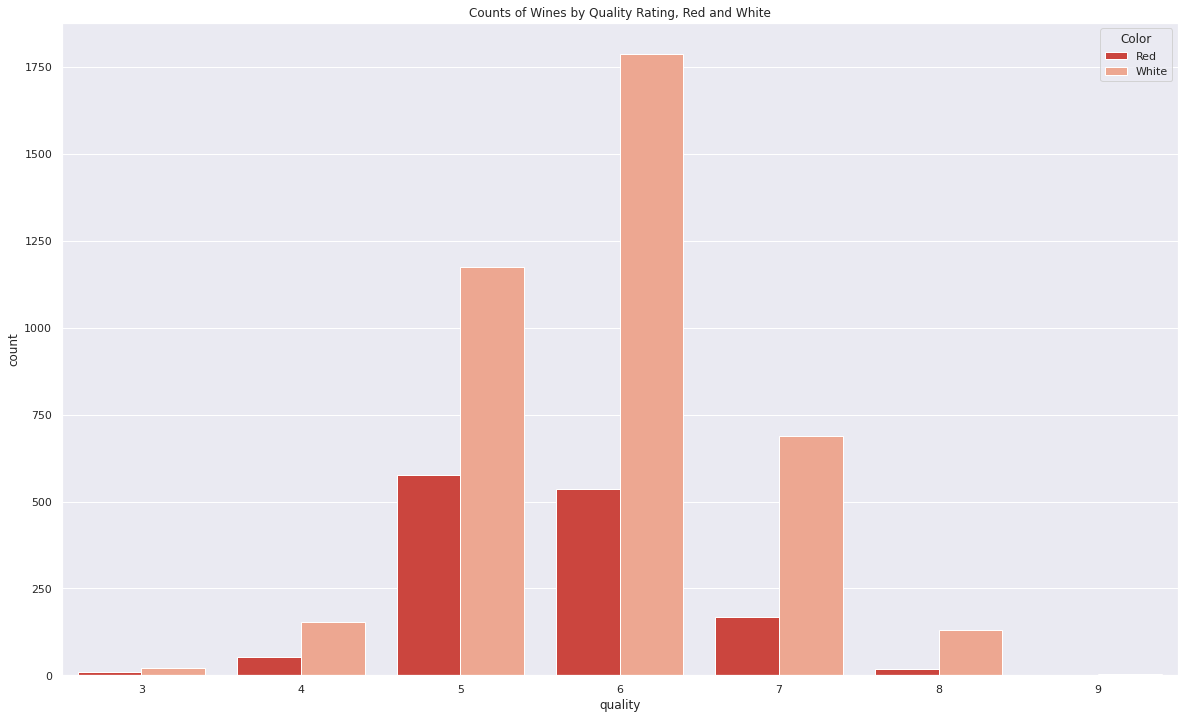

In [100]:
sns.countplot(data=df, x='quality', hue = 'Color', palette="Reds_r")
plt.title('Counts of Wines by Quality Rating, Red and White');

In [101]:
df.loc[df['quality'] == 9, :]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Color,quality
2373,9.1,0.27,0.45,10.6,0.035,28.0,124.0,0.99700,3.20,0.46,10.4,White,9
2419,6.6,0.36,0.29,1.6,0.021,24.0,85.0,0.98965,3.41,0.61,12.4,White,9
2426,7.4,0.24,0.36,2.0,0.031,27.0,139.0,0.99055,3.28,0.48,12.5,White,9
2475,6.9,0.36,0.34,4.2,0.018,57.0,119.0,0.98980,3.28,0.36,12.7,White,9
3204,7.1,0.26,0.49,2.2,0.032,31.0,113.0,0.99030,3.37,0.42,12.9,White,9


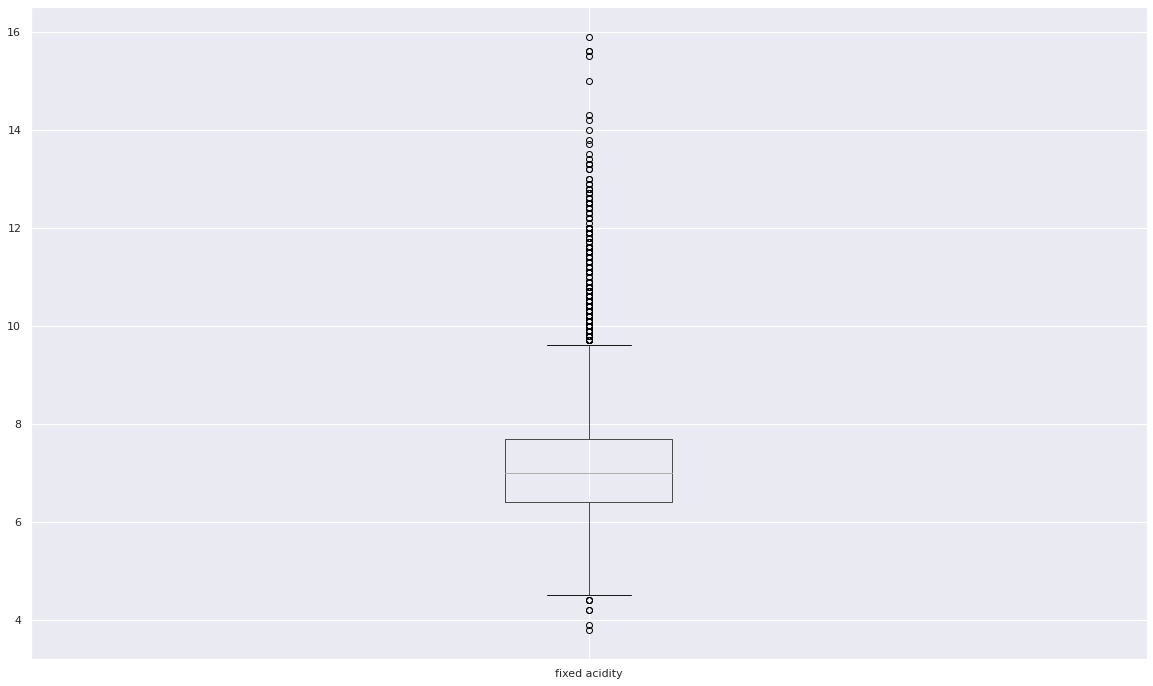

In [102]:
df.boxplot(column = 'fixed acidity');

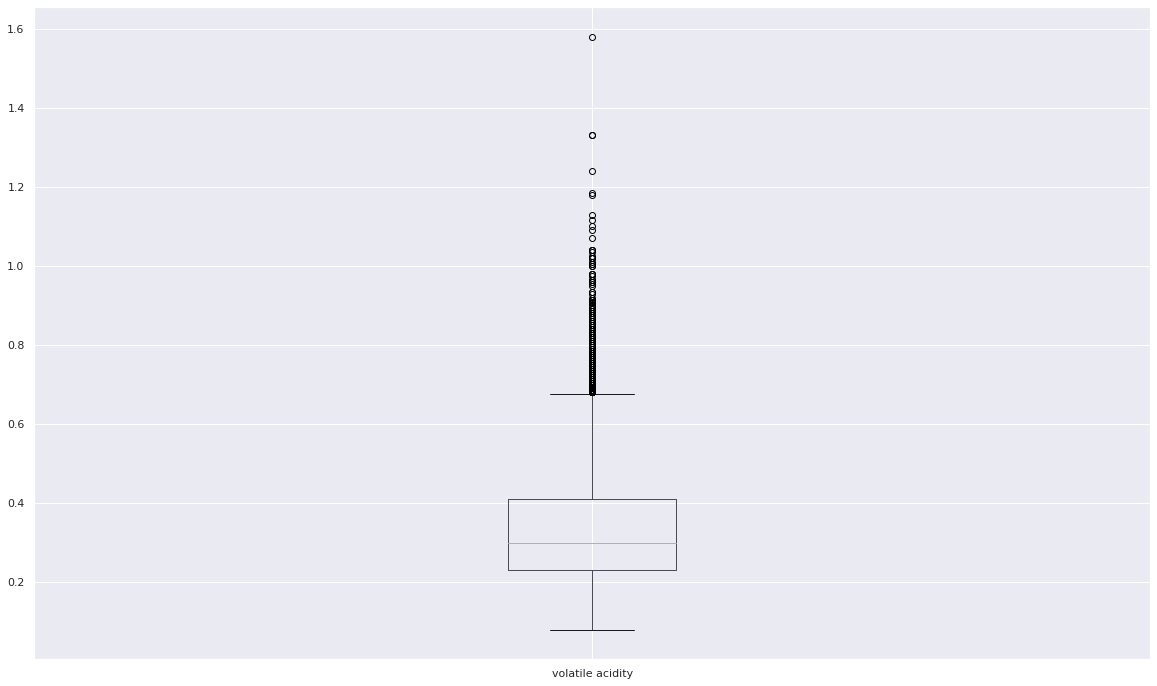

In [103]:
df.boxplot(column = 'volatile acidity');

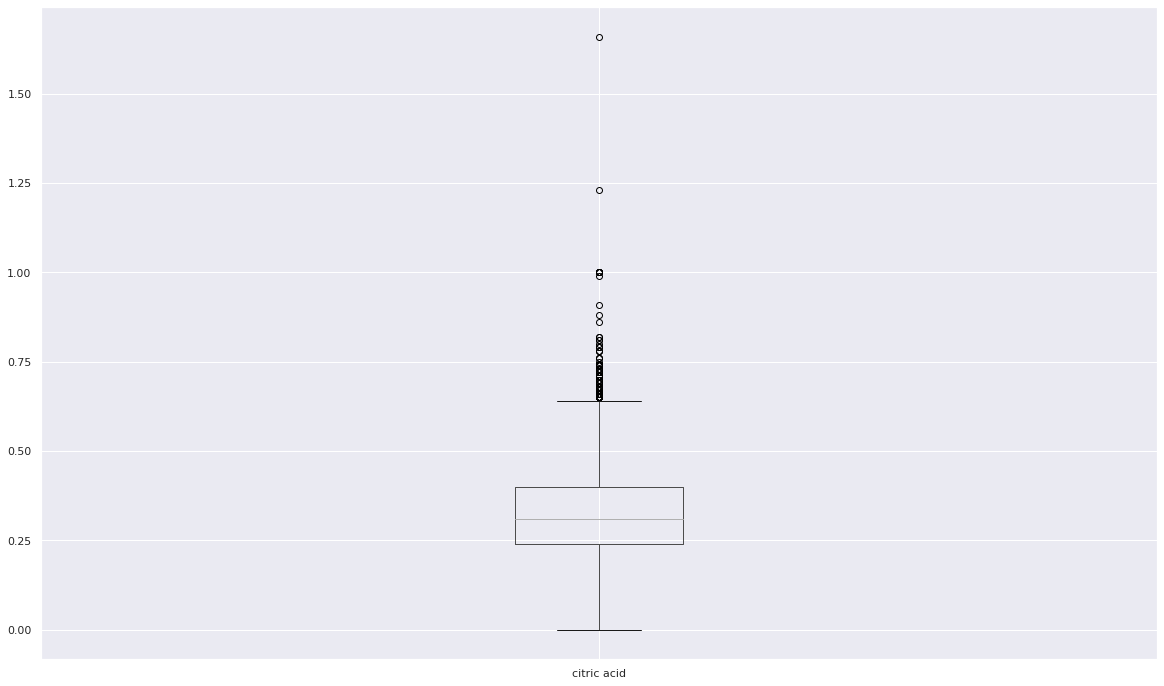

In [104]:
df.boxplot(column = 'citric acid');

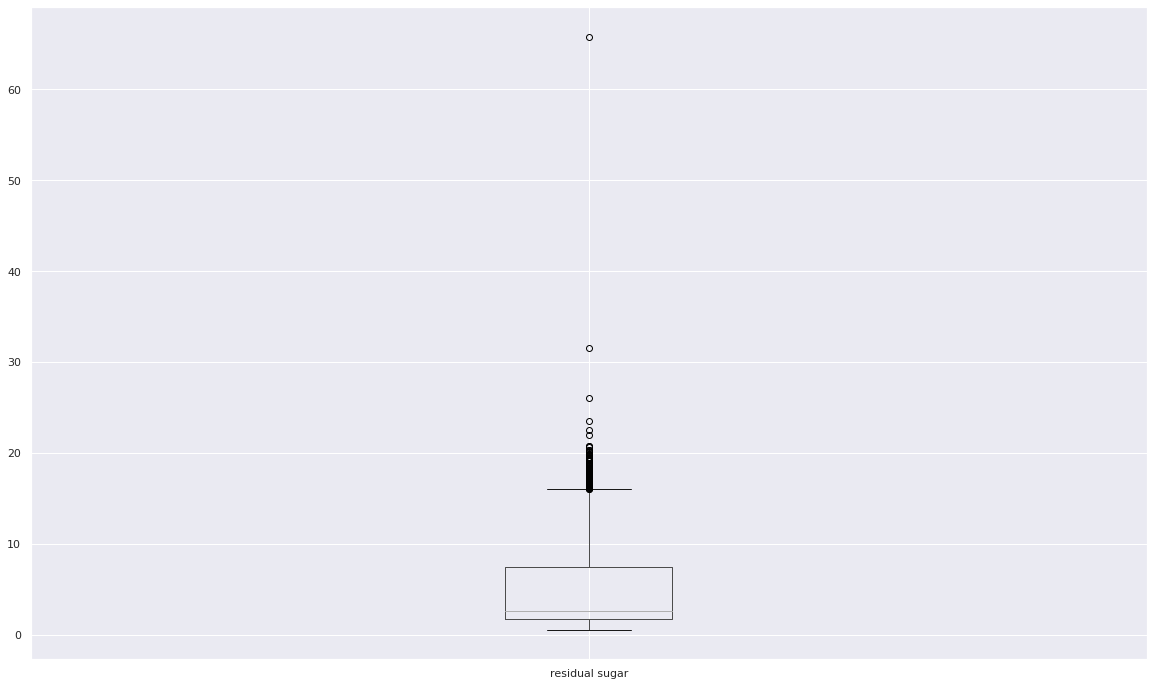

In [105]:
df.boxplot(column = 'residual sugar');

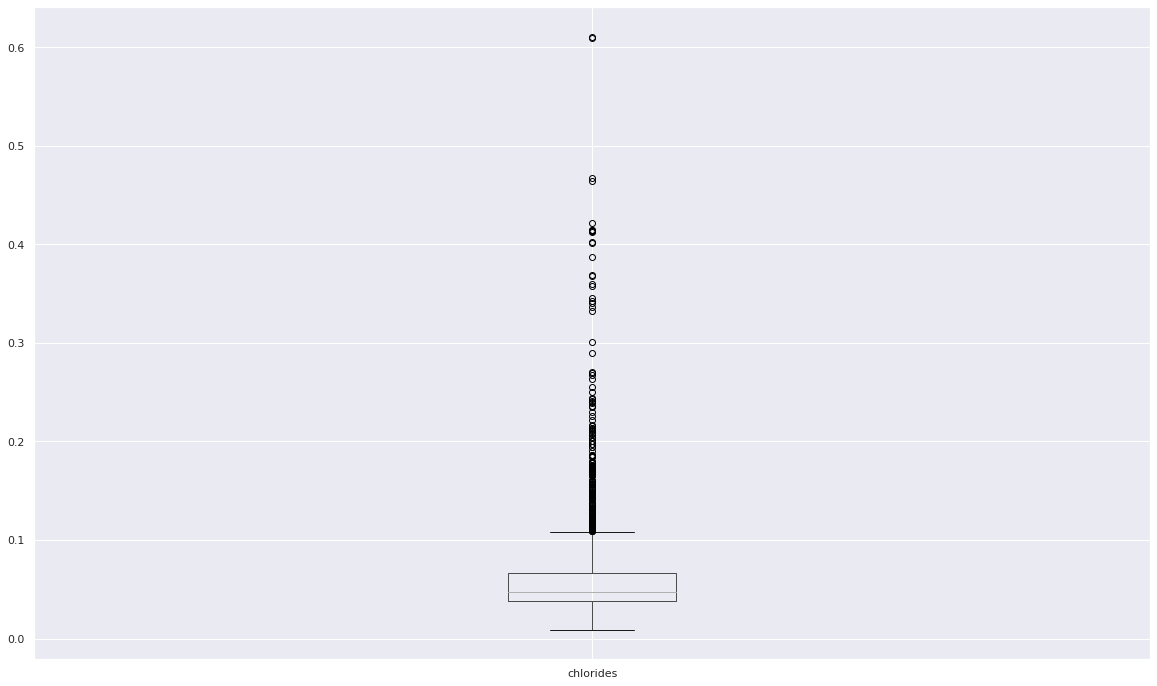

In [106]:
df.boxplot(column = 'chlorides');

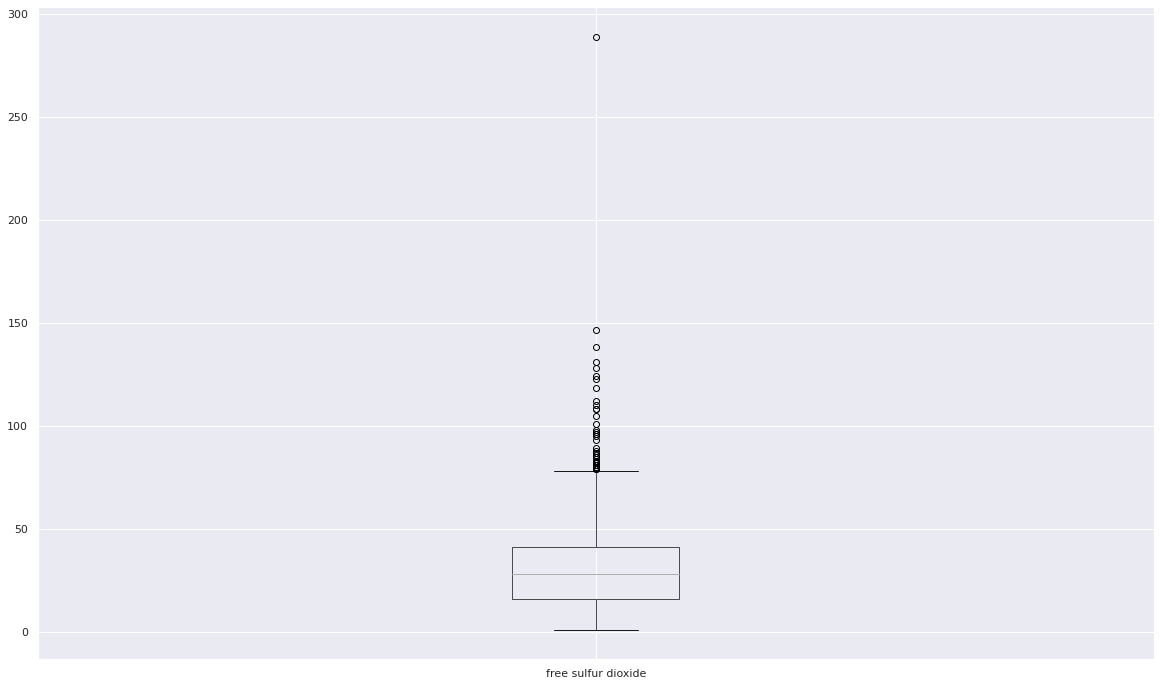

In [107]:
df.boxplot(column = 'free sulfur dioxide');

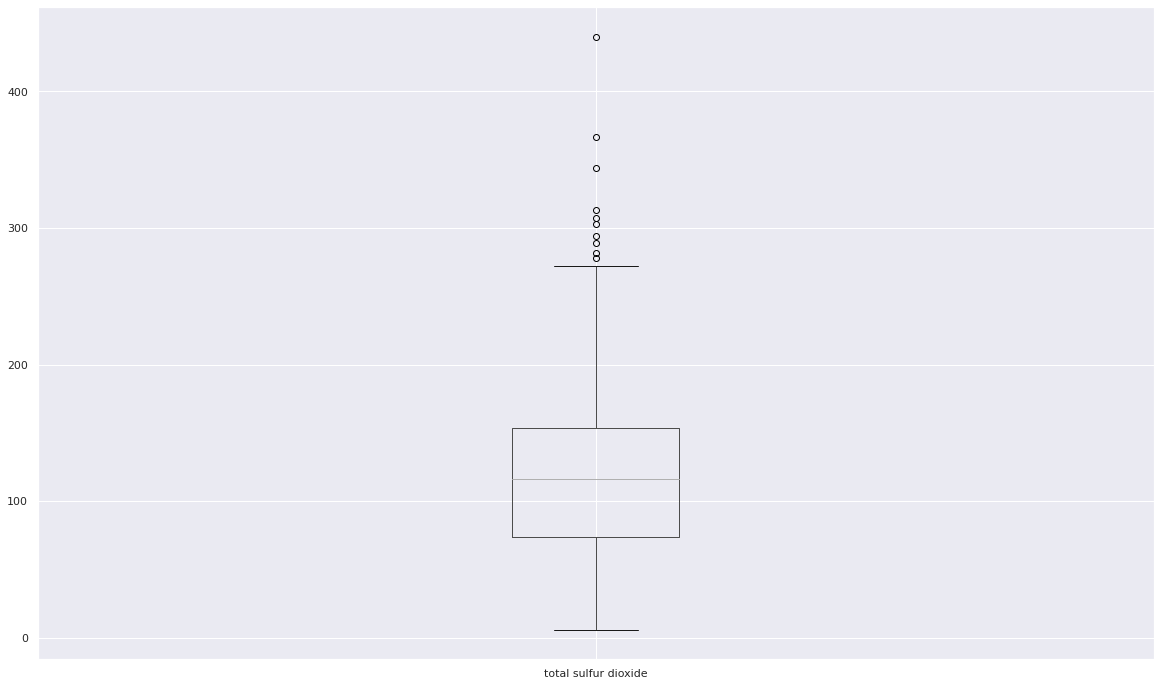

In [108]:
df.boxplot(column = 'total sulfur dioxide');

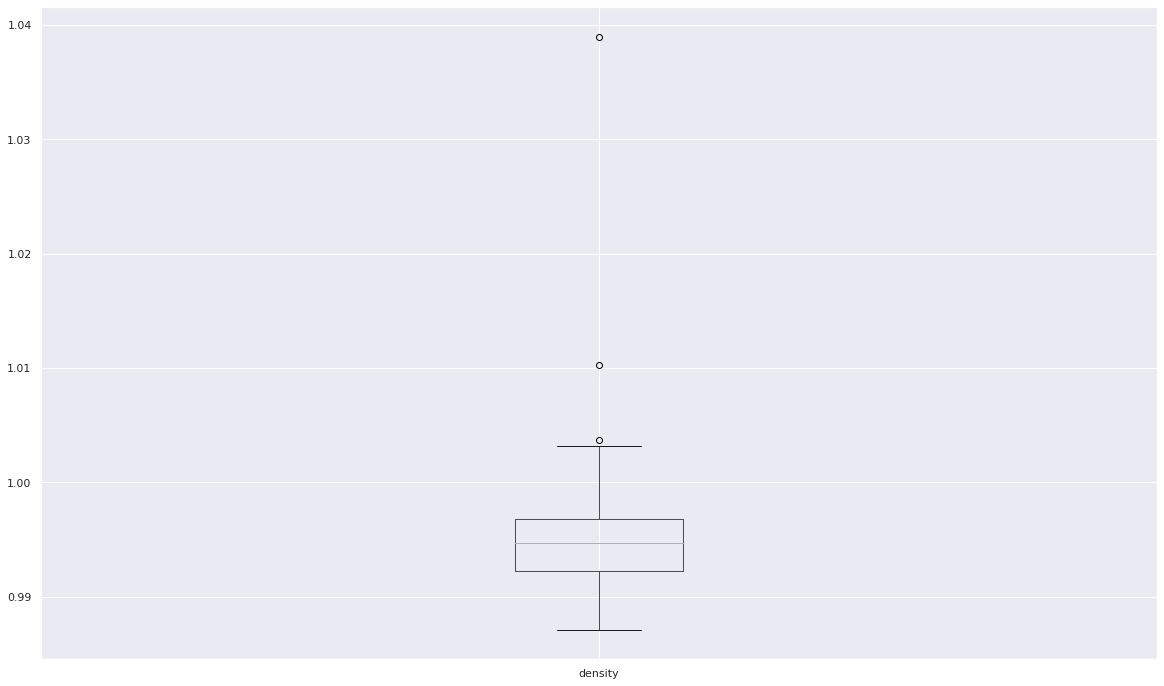

In [109]:
df.boxplot(column = 'density');

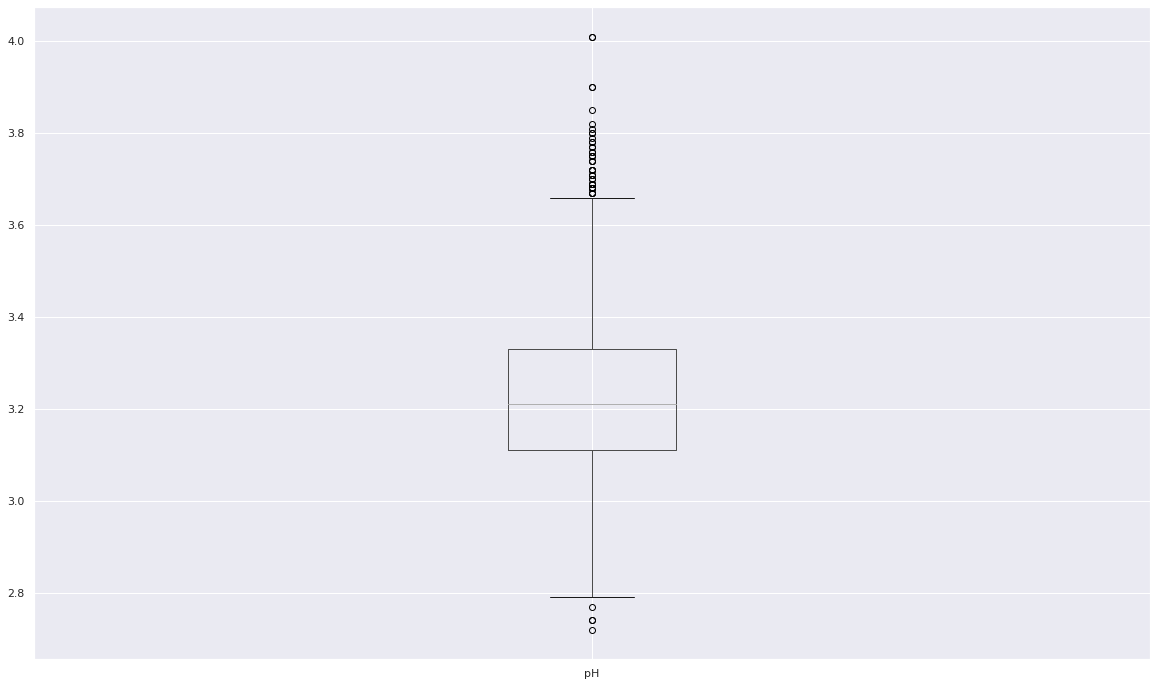

In [110]:
df.boxplot(column = 'pH');

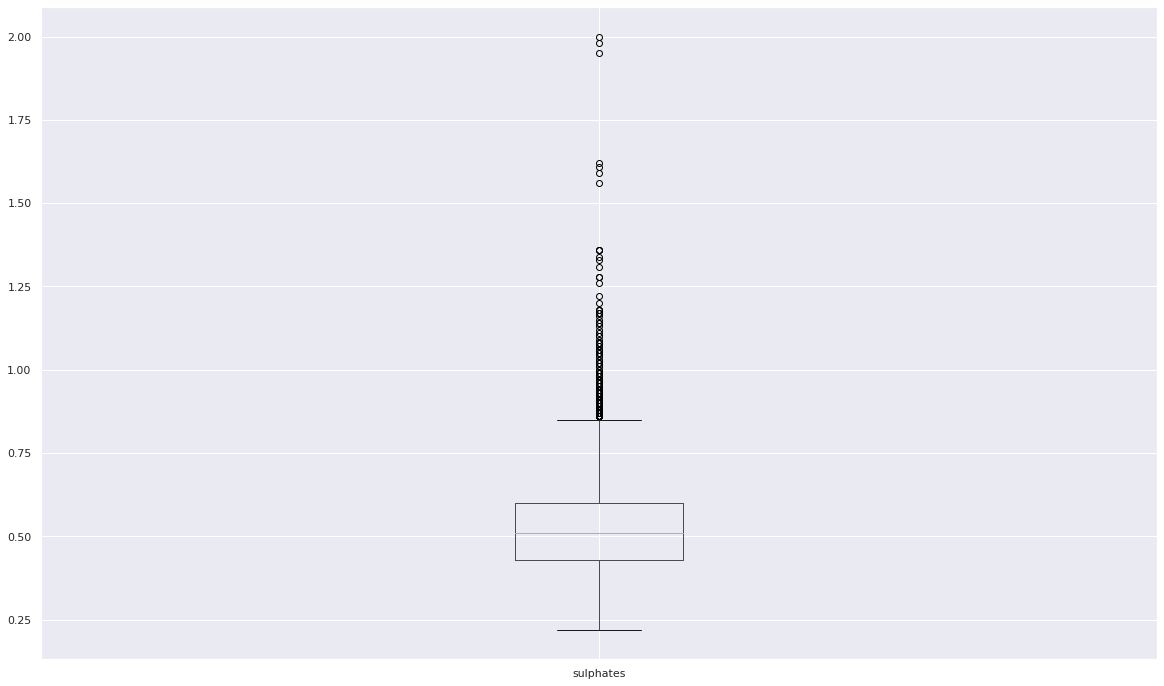

In [111]:
df.boxplot(column = 'sulphates');

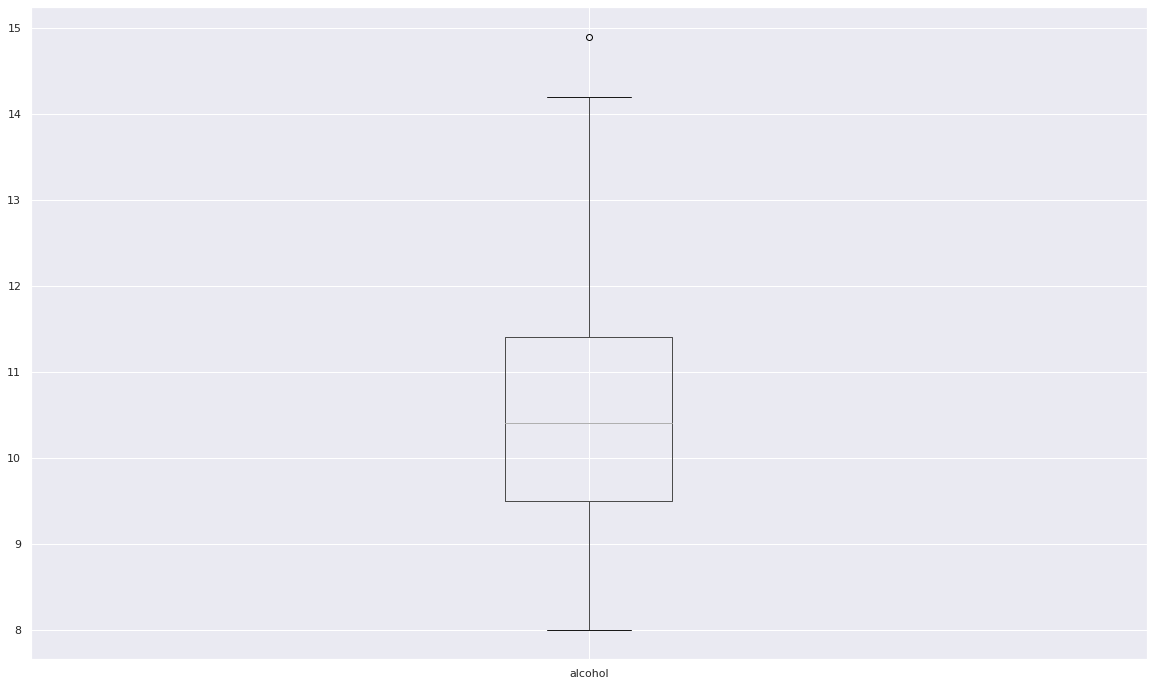

In [112]:
df.boxplot(column = 'alcohol');

According to our boxplots, there are substantial numbers of outliers within several of our columns; however, none of them seem unreasonable. Additionally, there are significantly more white wines in our data set than there are reds. We will have to take steps to ebsure our split data is properly balanced.    

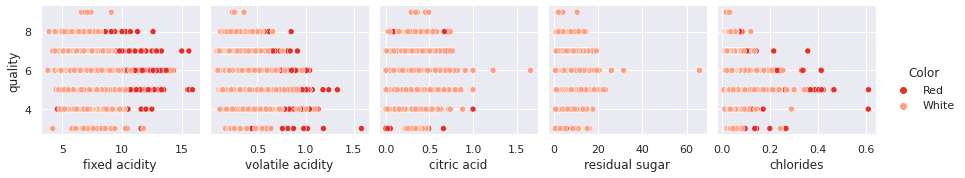

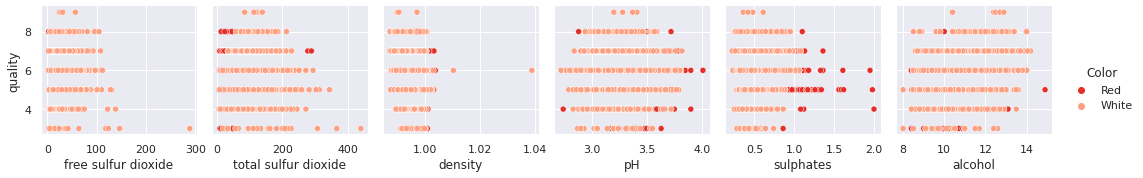

In [113]:
# This pairplot can help us get a sense of the relationships between each of our features and our target vector. 

sns.pairplot(df,
             x_vars=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides'],
             y_vars = ['quality'],
             hue = 'Color',
             palette="Reds_r");

sns.pairplot(df,
             x_vars=['free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'],
             y_vars = ['quality'],
             hue = 'Color',
             palette="Reds_r");

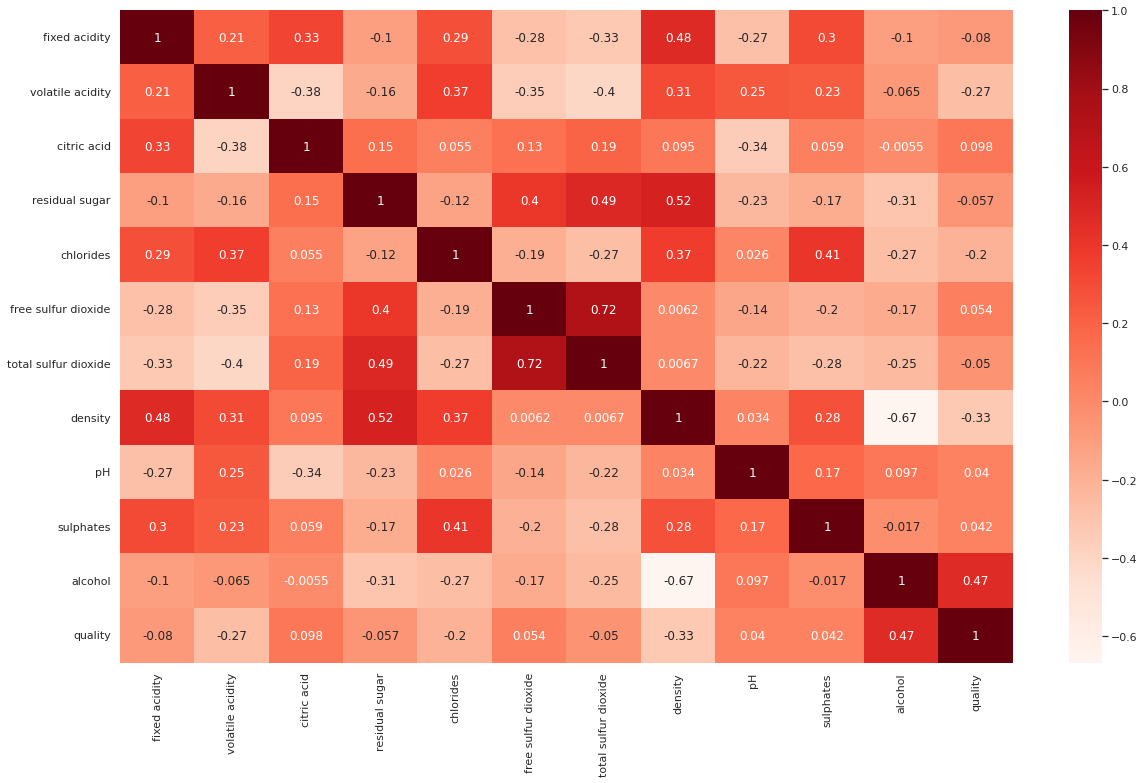

In [114]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap = 'Reds');
sns.set(rc={'figure.figsize':(20,12)})

The feature with the highest correlation to quality is the alcohol percentage. 

# **Data Processing**

In [115]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

In [116]:
# Train/Test Split

y = df['quality']
X = df.drop(columns=['quality'])
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [117]:
# We need to create a pipeline to transform our data and avoid data leakage 

from sklearn.pipeline import make_pipeline
cat_feat = make_column_selector(dtype_include='object')
num_feat = make_column_selector(dtype_include='number')
mean_imputer = SimpleImputer(strategy='mean')
freq_imputer = SimpleImputer(strategy='most_frequent')

encoder = OneHotEncoder(sparse = False, handle_unknown='ignore')
scaler = StandardScaler()
num_processor = make_pipeline(mean_imputer, scaler)
cat_processor = make_pipeline(freq_imputer, encoder)

num_tuple = (num_processor, num_feat)
cat_tuple = (cat_processor, cat_feat)

In [118]:
column_transformer = make_column_transformer(num_tuple, cat_tuple, remainder = 'passthrough')

In [119]:
column_transformer.fit(X_train, y_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f1524bedf10>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.mak

# **Data Modeling**

In [120]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

**K-Nearest Neighbors**

In [121]:
# Let's begin with a KNN Model

knn = KNeighborsClassifier()

knn_pipe = make_pipeline(column_transformer, knn)
knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f1524bedf10>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                   

In [122]:
train_preds = knn_pipe.predict(X_train)
test_preds = knn_pipe.predict(X_test)

print('Train Accuracy:', accuracy_score(y_train, train_preds))
print('Test Accuracy:', accuracy_score(y_test, test_preds))

Train Accuracy: 0.6664160401002506
Test Accuracy: 0.5165413533834586


In [123]:
# We can tune our hyperparameters to see if we can get a better score

knn_params = {'kneighborsclassifier__n_neighbors' : [3,5,7,9],
              'kneighborsclassifier__leaf_size' : [15, 20, 30]}

In [124]:
knn_gs = GridSearchCV(knn_pipe, knn_params)
knn_gs.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,


GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer()),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f1524bedf10>),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[

In [125]:
knn_gs.best_params_

{'kneighborsclassifier__leaf_size': 15, 'kneighborsclassifier__n_neighbors': 9}

In [126]:
best_knn = knn_gs.best_estimator_

In [127]:
train_preds = best_knn.predict(X_train)
test_preds = best_knn.predict(X_test)

print('Train Accuracy:', accuracy_score(y_train, train_preds))
print('Test Accuracy:', accuracy_score(y_test, test_preds))

Train Accuracy: 0.6265664160401002
Test Accuracy: 0.5233082706766917


With our tuned hyperparameters, we are seeing an accuracy of about 52% on our testing data. This isn't ideal, let's see if other kinds of models can perform better. 

**Random Forest**

In [128]:
rf = RandomForestClassifier(random_state=42)
rf_pipe = make_pipeline(column_transformer, rf)
rf_pipe.fit(X_train, y_train)

train_preds = rf_pipe.predict(X_train)
test_preds = rf_pipe.predict(X_test)

print('RF Train Accuracy:', accuracy_score(y_train, train_preds))
print('RF Test Accuracy:', accuracy_score(y_test, test_preds))

RF Train Accuracy: 1.0
RF Test Accuracy: 0.5721804511278196


This model is performing better on the test data than our KNN model, but is still pretty overfit. Let's see if we can tune the parameters. 

In [129]:
rf_pipe.get_params()

{'columntransformer': ColumnTransformer(remainder='passthrough',
                   transformers=[('pipeline-1',
                                  Pipeline(steps=[('simpleimputer',
                                                   SimpleImputer()),
                                                  ('standardscaler',
                                                   StandardScaler())]),
                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f1524bedf10>),
                                 ('pipeline-2',
                                  Pipeline(steps=[('simpleimputer',
                                                   SimpleImputer(strategy='most_frequent')),
                                                  ('onehotencoder',
                                                   OneHotEncoder(handle_unknown='ignore',
                                                                 sparse=False))]),
                                  <skle

In [130]:
rf_params = {'randomforestclassifier__max_depth' : [None, 5],
             'randomforestclassifier__n_estimators' : [100, 300, 500],
             'randomforestclassifier__min_samples_split' : [2,4]}

In [131]:
rf_gs = GridSearchCV(rf_pipe, rf_params)
rf_gs.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,


GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer()),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f1524bedf10>),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[

In [132]:
rf_gs.best_params_

{'randomforestclassifier__max_depth': None,
 'randomforestclassifier__min_samples_split': 4,
 'randomforestclassifier__n_estimators': 300}

In [133]:
best_rf = rf_gs.best_estimator_
train_preds = best_rf.predict(X_train)
test_preds = best_rf.predict(X_test)

print('RF Train Accuracy:', accuracy_score(y_train, train_preds))
print('RF Test Accuracy:', accuracy_score(y_test, test_preds))

RF Train Accuracy: 0.9997493734335839
RF Test Accuracy: 0.5804511278195489


This is a slight improvement, but still not ideal. 

Let's try a deep learning model

In [134]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import metrics
from sklearn.preprocessing import LabelEncoder, LabelBinarizer

In [135]:
# Learning history plotting function
def plot_history(history):
  """Takes a keras model learning history and plots each metric"""
  
  metrics = history.history.keys()
  
  for metric in metrics:
      if not 'val' in metric:
        plt.plot(history.history[f'{metric}'], label=f'{metric}')
        if f'val_{metric}' in metrics:
          plt.plot(history.history[f'val_{metric}'], label=f'val_{metric}')
        plt.legend()
        plt.title(f'{metric}')
        plt.show()

In [136]:
X_train_pro = column_transformer.fit_transform(X_train)
X_test_pro = column_transformer.transform(X_test)

In [137]:
# Encode labels

encoder = LabelEncoder()
encoder.fit(y_train)
y_train_enc = encoder.transform(y_train)
y_test_enc = encoder.transform(y_test)

classes = encoder.classes_

binarizer = LabelBinarizer()
binarizer.fit(y_train_enc)

y_train_bin = binarizer.transform(y_train_enc)
y_test_bin = binarizer.transform(y_test_enc)

print('Original Target')
print(y_train.head())
print('---')
print('Encoded Target')
print(y_train_enc[:5])
print('---')
print('Binarized Target')
print(y_train_bin[:5])

Original Target
3205    6
957     6
568     6
5082    7
648     7
Name: quality, dtype: int64
---
Encoded Target
[3 3 3 4 4]
---
Binarized Target
[[0 0 0 1 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 0 1 0 0]
 [0 0 0 0 1 0 0]]


In [138]:
# Create Model Architecture

input_dim = X_train_pro.shape[1]
num_classes = len(classes)

# Instantiate Base Model
multi_model = Sequential()
# Add layers
multi_model.add(Dense(50, input_dim=input_dim, activation='relu'))
multi_model.add(Dropout(0.3))
multi_model.add(Dense(50, activation='relu'))
multi_model.add(Dropout(0.3))
multi_model.add(Dense(num_classes, activation='softmax'))
multi_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 50)                700       
                                                                 
 dropout_3 (Dropout)         (None, 50)                0         
                                                                 
 dense_5 (Dense)             (None, 50)                2550      
                                                                 
 dropout_4 (Dropout)         (None, 50)                0         
                                                                 
 dense_6 (Dense)             (None, 7)                 357       
                                                                 
Total params: 3,607
Trainable params: 3,607
Non-trainable params: 0
_________________________________________________________________


In [139]:
# Compile model with categorical cross-entropy

multi_model.compile(loss='categorical_crossentropy',
                    optimizer='adam',
                    metrics=['accuracy',
                             metrics.Precision(),
                             metrics.Recall()])

In [140]:
# Fit the model

history = multi_model.fit(X_train_pro, y_train_bin,
                          validation_data=(X_test_pro, y_test_bin),
                          epochs = 150,
                          verbose = 0)

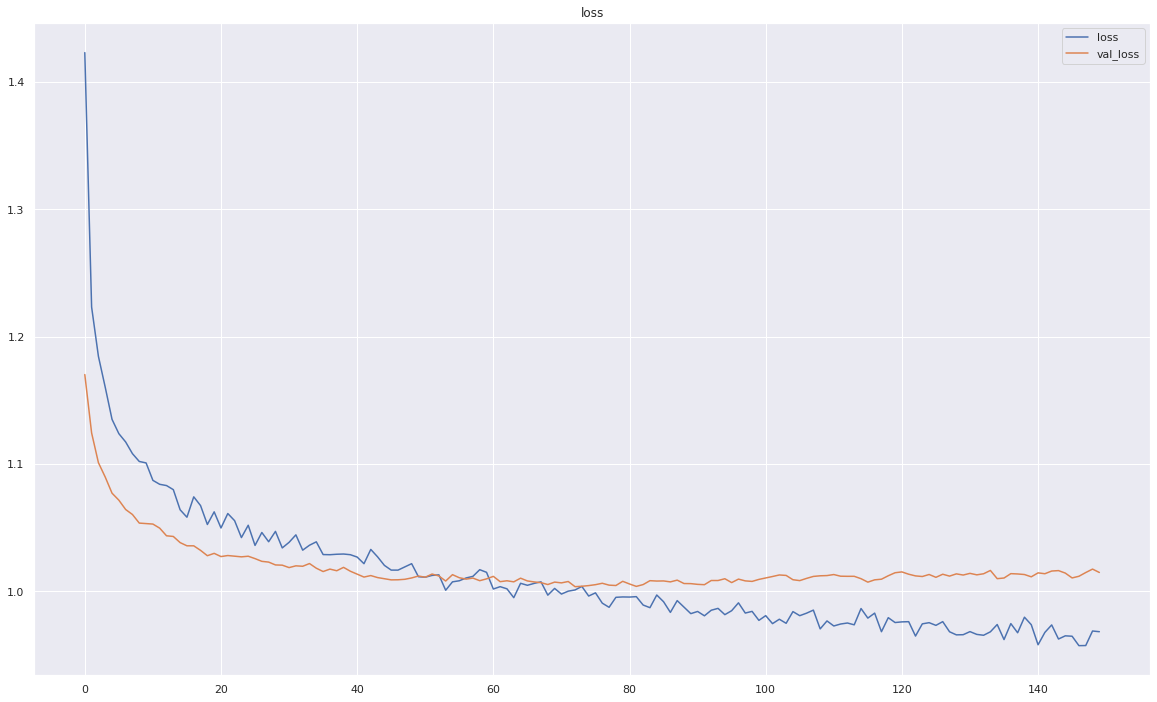

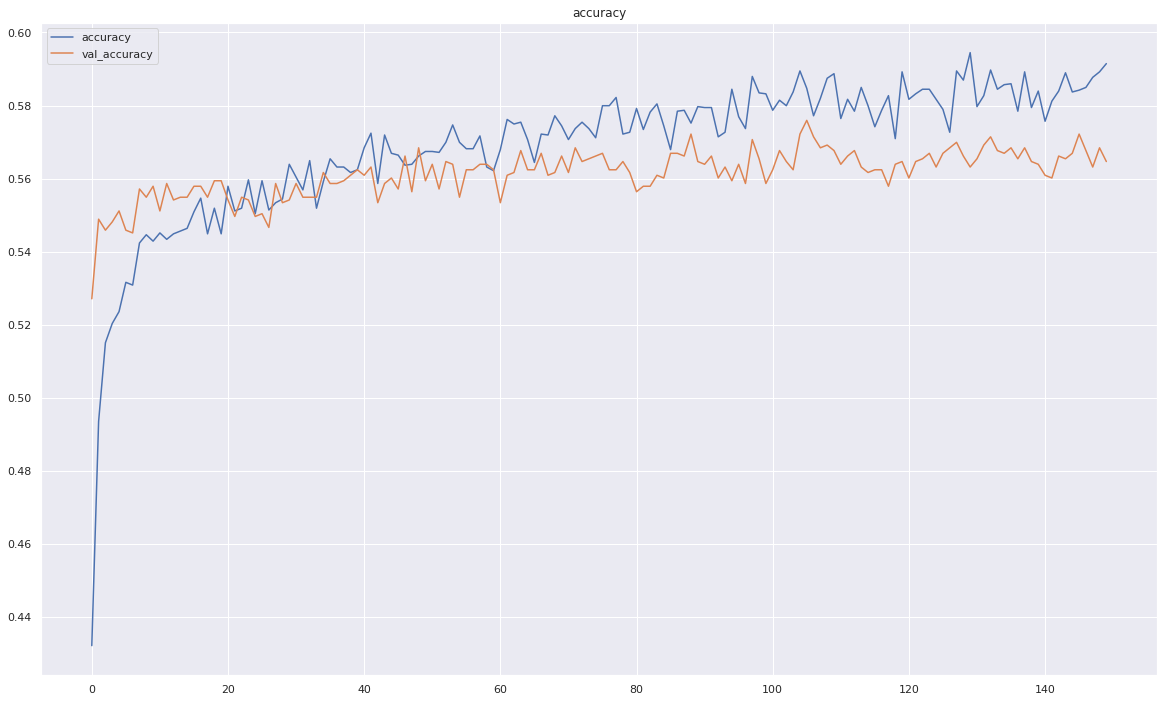

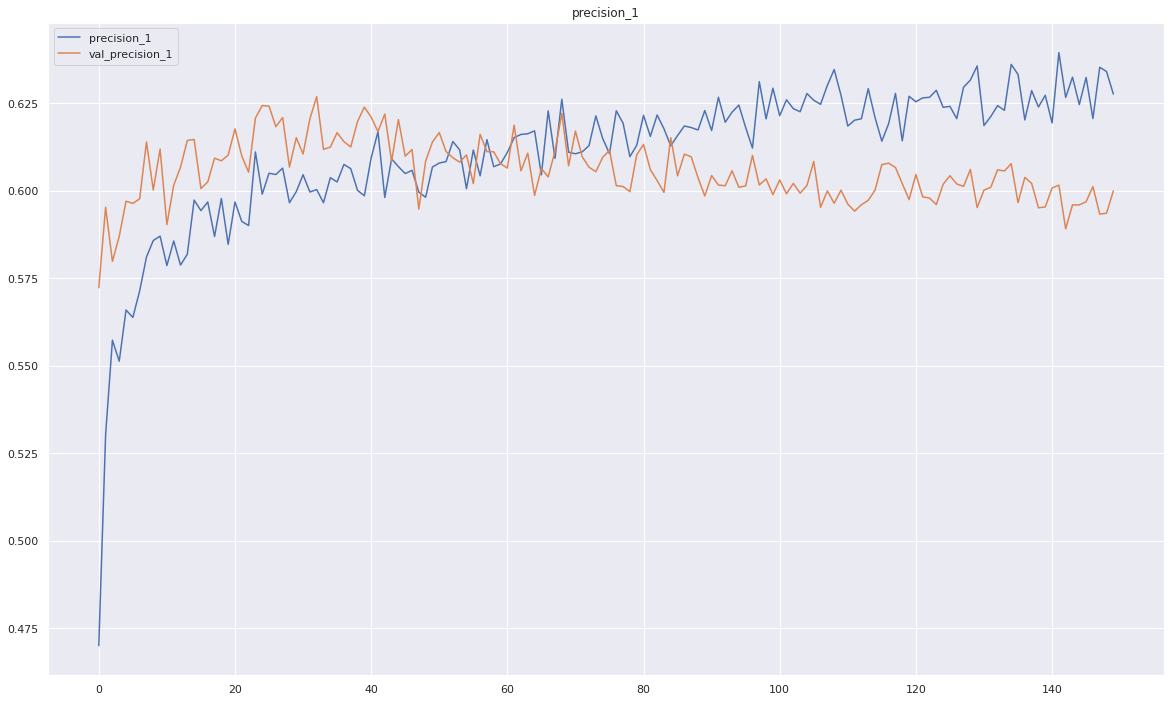

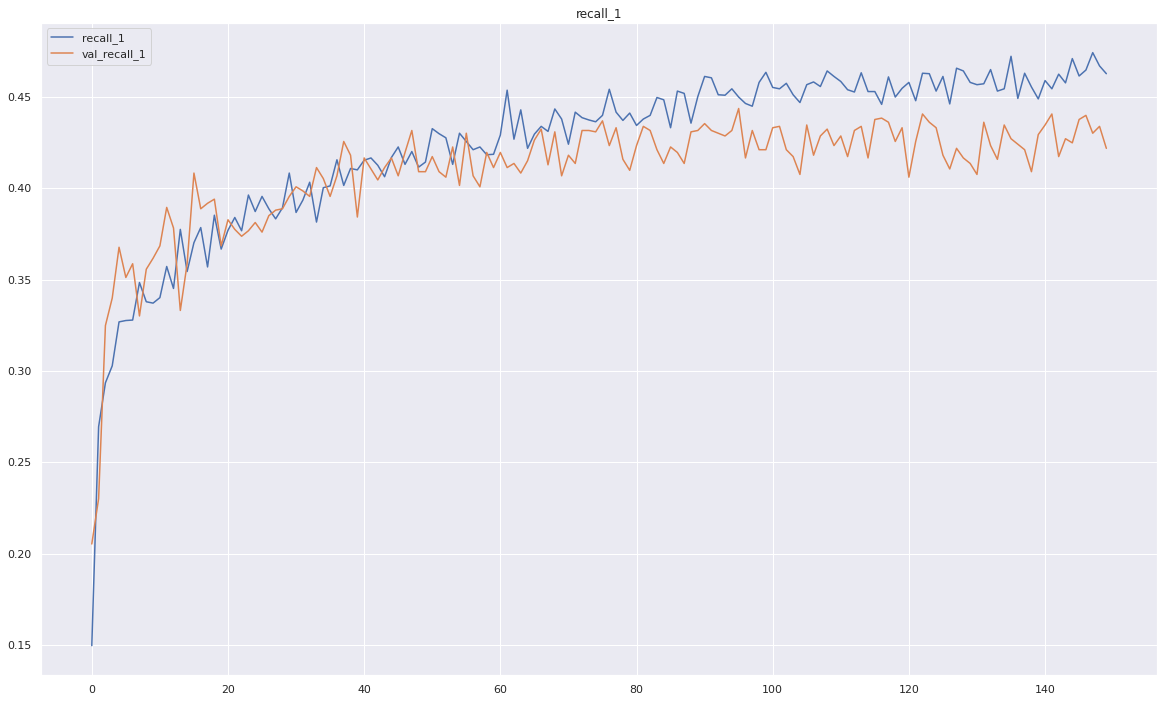

In [141]:
plot_history(history)

In [142]:
# Get raw predictions
raw_pred = multi_model.predict(X_test_pro)
print('Raw Predictions:', raw_pred[:5])
print('---')
print('Binarized y_test:', y_test_bin[:5])

Raw Predictions: [[2.12473751e-05 1.34162034e-03 2.04993356e-02 5.83914936e-01
  3.56270075e-01 3.79522778e-02 5.44574789e-07]
 [7.10330380e-04 9.11799148e-02 6.77184999e-01 2.25895762e-01
  4.80849529e-03 2.20439382e-04 1.85740464e-12]
 [1.65630563e-03 4.38954122e-03 1.37114808e-01 5.09537220e-01
  3.08251381e-01 3.89820859e-02 6.86369676e-05]
 [2.39054044e-03 2.96392087e-02 3.38215441e-01 5.46125472e-01
  7.92538002e-02 4.37541027e-03 1.03737094e-07]
 [4.70266474e-04 1.84906591e-02 5.07553995e-01 4.39612240e-01
  3.30871120e-02 7.85804994e-04 3.10824033e-10]]
---
Binarized y_test: [[0 0 0 1 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 0 1 0 0]
 [0 0 1 0 0 0 0]]


In [143]:
# Convert our predictions and labels into integers representing each quality rating
y_pred = np.argmax(raw_pred, axis=1)
y_true = np.argmax(y_test_bin, axis=1)

print('Integer Predictions:', y_pred)
print('Integer True Labels:', y_true)

Integer Predictions: [3 2 3 ... 3 3 2]
Integer True Labels: [3 2 3 ... 3 3 2]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.60      0.06      0.11        51
           2       0.60      0.62      0.61       438
           3       0.55      0.69      0.61       581
           4       0.53      0.35      0.42       214
           5       0.00      0.00      0.00        37
           6       0.00      0.00      0.00         1

    accuracy                           0.56      1330
   macro avg       0.33      0.25      0.25      1330
weighted avg       0.55      0.56      0.54      1330



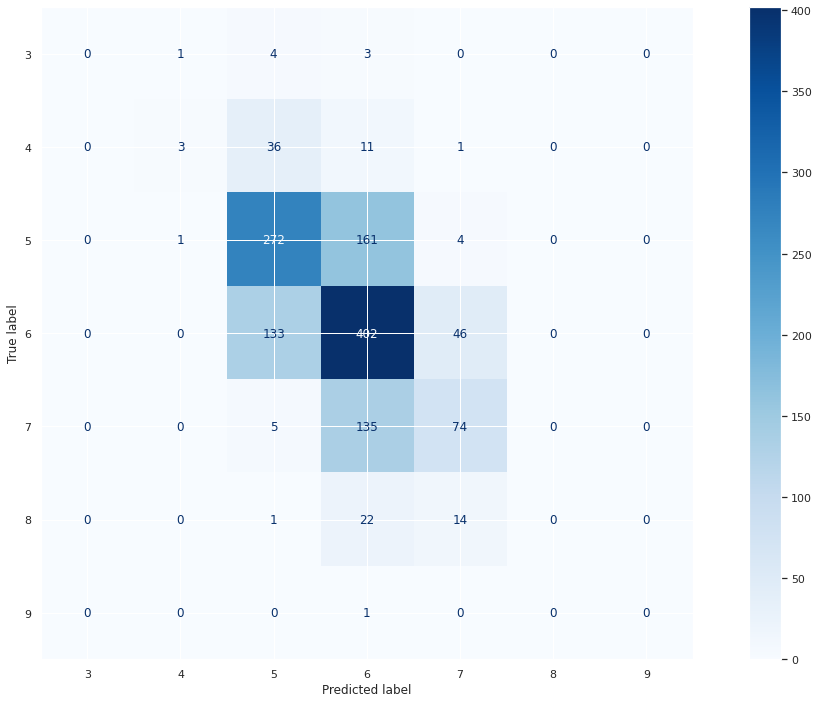

In [145]:
print(classification_report(y_true, y_pred))
ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                                        display_labels=classes,
                                        cmap='Blues');

This model correctly classified about 56% of our wines. 

**Summary**

After comparing our three models, it appears our random forest model was the most accurate. The important thing to remember is that wine quality is a subjective variable, and sommeliers will often disagree wildly on a wines true quality, if such a thing even exists. Our model is getting close to predicting quality accurately, based on physiochemical properties, but the truth is the correlation between these properties and the enjoyability of a wine is subjective, and therefore difficult for a model to accurately predict.